In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
X,y=make_moons(n_samples=1000,noise=0.2,random_state=42)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

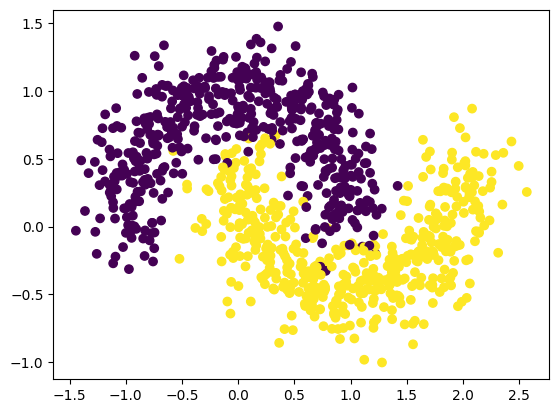

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
dt=DecisionTreeClassifier()

In [8]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
y_pred=dt.predict(X_test)

In [10]:
print("accuracy_of_dt is",accuracy_score(y_test,y_pred))

accuracy_of_dt is 0.955


In [11]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

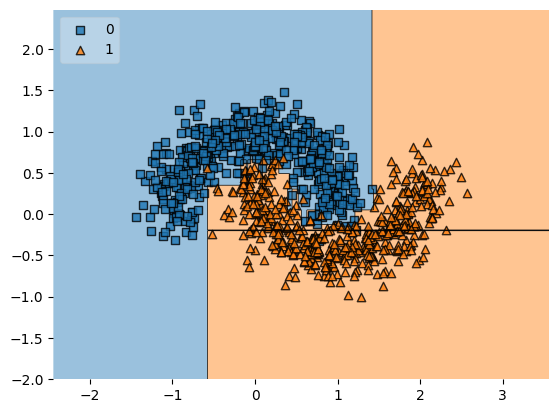

In [12]:
plot_decision_regions(X,y,clf=dt,legend=2)

In [13]:
dt1=DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=5,)

In [17]:
bagging_clf=BaggingClassifier(
    estimator=dt1,n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1
)

In [139]:
bagging_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5),
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [140]:
y_pred=bagging_clf.predict(X_test)

In [141]:
print('accuarcy_of_bagging_clf is',accuracy_score(y_test,y_pred))

accuarcy_of_bagging_clf is 0.97


<Axes: >

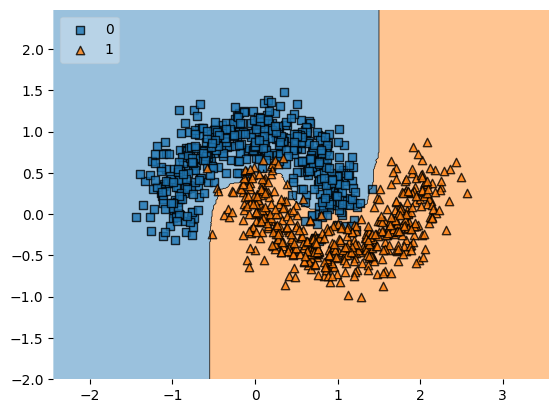

In [142]:
plot_decision_regions(X,y,clf=bagging_clf,legend=2)

In [143]:
param_grid = {
    'criterion': ['gini', 'entropy'],               # Split criterion
    'max_depth': [None,5, 7, 10, ],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],         # Number of features to consider for best split
}

In [144]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1,n_jobs=-1)

In [145]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [146]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.95875


In [147]:
best_model=grid_search.best_estimator_
accuracy=best_model.score(X_test,y_test)

In [148]:
print(accuracy)

0.965


<Axes: >

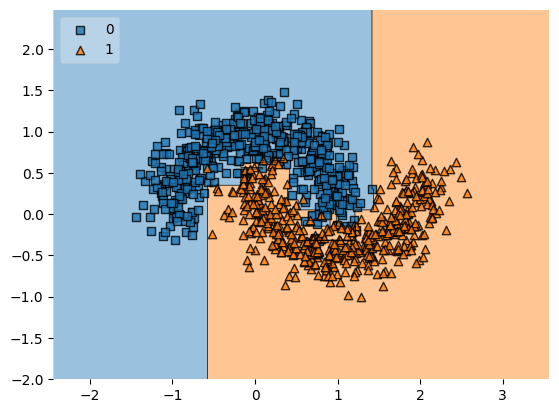

In [149]:
plot_decision_regions(X,y,clf=best_model,legend=2)

In [150]:
from sklearn.svm import SVC

In [151]:
svm=SVC()

In [152]:
bagging_clf=BaggingClassifier(
    svm,n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1
)

In [153]:
bagging_clf.fit(X_train,y_train)

BaggingClassifier(estimator=SVC(), max_samples=100, n_estimators=500, n_jobs=-1)

In [154]:
y_pred=bagging_clf.predict(X_test)
print('accuarcy_of_bagging_clf is',accuracy_score(y_test,y_pred))

accuarcy_of_bagging_clf is 0.955


# out of bag(OOB) instances which are not selected by base models 

In [155]:
bagging_clf=BaggingClassifier(
    dt,n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,
    oob_score=True
)

In [156]:
bagging_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [161]:
y_pred=bagging_clf.predict(X_test)
bagging_clf.oob_score_

0.9625

In [162]:
print('accuarcy_of_bagging_clf is',accuracy_score(y_test,y_pred))

accuarcy_of_bagging_clf is 0.97


In [163]:
bagging_clf.oob_decision_function_

array([[0.02477477, 0.97522523],
       [0.9753915 , 0.0246085 ],
       [1.        , 0.        ],
       ...,
       [0.92180095, 0.07819905],
       [0.8344519 , 0.1655481 ],
       [0.02941176, 0.97058824]])